## Rhexis augmented detection test
The first prototype send to us by Bioniko that has the extended black ring designed for more reliable tracking.

### 1. Imports

In [8]:
import cv2
from matplotlib import pyplot as plt

from helpers.limbus_detection import detect_circle


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Detection

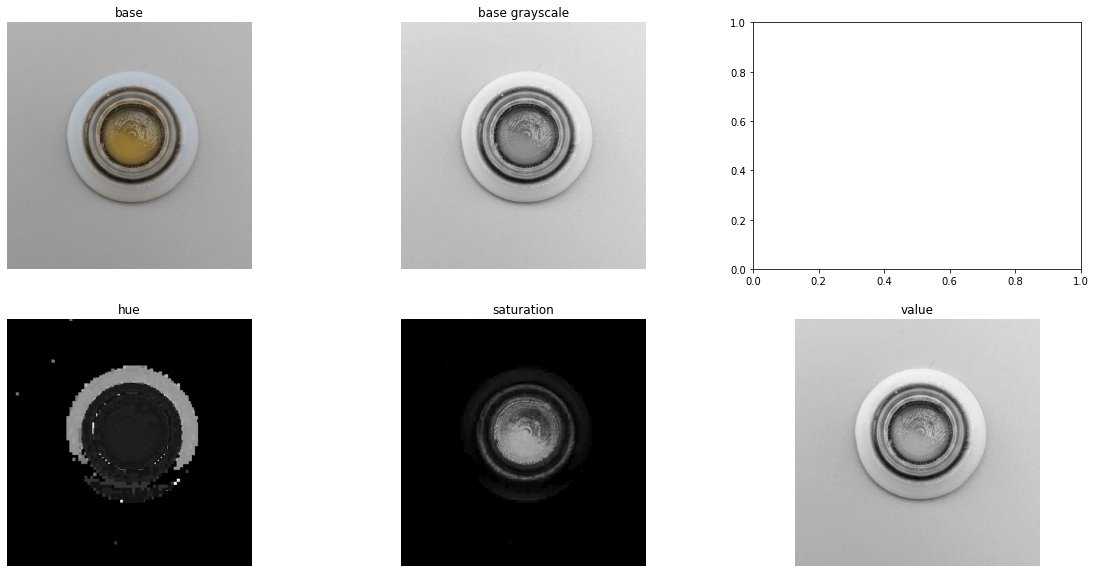

size: 640x648


In [9]:
WIDTH = 640

base = cv2.imread(
    'data/artificial/rhexis_augmented_base.jpg', cv2.IMREAD_COLOR)
scale = WIDTH / base.shape[1]
base = cv2.resize(base, (0, 0), fx=scale, fy=scale)

base_rgb = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)
base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)
base_hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)

base_hue = base_hsv[:, :, 0]
base_saturation = base_hsv[:, :, 1]
base_value = base_hsv[:, :, 2]

fig, ((plot1, plot2, _), (plot3, plot4, plot5)
      ) = plt.subplots(2, 3, figsize=(20, 10))
plot1.set_title('base')
plot1.imshow(base_rgb)
plot1.axis('off')

plot2.set_title('base grayscale')
plot2.imshow(base_gray, cmap=plt.cm.gray)
plot2.axis('off')

plot3.set_title('hue')
plot3.imshow(base_hue, cmap=plt.cm.gray)
plot3.axis('off')

plot4.set_title('saturation')
plot4.imshow(base_saturation, cmap=plt.cm.gray)
plot4.axis('off')

plot5.set_title('value')
plot5.imshow(base_value, cmap=plt.cm.gray)
plot5.axis('off')

plt.show()

print('size: %dx%d' % (base.shape[1], base.shape[0]))

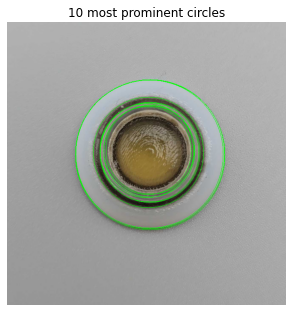

In [10]:
DRAW_CIRCLES = 10

circles = detect_circle(base_value, return_all=True)

base_rgb_copy = base_rgb.copy()
for circle in circles[:DRAW_CIRCLES]:
    cv2.circle(base_rgb_copy, (round(circle[0]), round(
        circle[1])), round(circle[2]), (0, 255, 0))

_, plot = plt.subplots(1, 1, figsize=(5, 10))
plot.set_title('%d most prominent circles' % DRAW_CIRCLES)
plot.imshow(base_rgb_copy)
plot.axis('off')

plt.show()

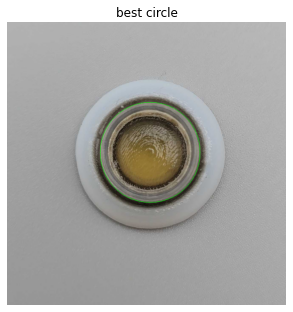

In [11]:
best_circle = detect_circle(
    base_value,
    validation='inout',
    validation_mode='min',
    validation_value_thresh=0.0,
    considered_ratio_s=0.1,
    circle_width_to_radius_ratio=0.1
)

base_rgb_copy = base_rgb.copy()
cv2.circle(base_rgb_copy, (round(best_circle[0]), round(
    best_circle[1])), round(best_circle[2]), (0, 255, 0))

_, plot = plt.subplots(1, 1, figsize=(5, 10))
plot.set_title('best circle')
plot.imshow(base_rgb_copy)
plot.axis('off')

plt.show()

Seems to be working well on this example. We need test to see if it generalizes well.